In [152]:
GLOBA_PATH = input()

https://duncan-donations-pairs-skype.trycloudflare.com


In [1]:
import time
import matplotlib.pyplot as plt
import yaml

import pandas as pd
import requests

HEALTH_PATH = GLOBA_PATH + "/health"
GET_RECO_PATH = GLOBA_PATH +  "/reco/userKNN_with_popular/{user_id}"
with open('../service/envs/authentication_env.yaml') as env_config:
    ENV_TOKEN = yaml.safe_load(env_config)

In [154]:
interactions = pd.read_csv('../data/kion_train/interactions.csv')
user_id = interactions['user_id'].iloc[0]
user_id

176549

In [155]:
response = requests.get(HEALTH_PATH, headers={"Authorization": f"Bearer {ENV_TOKEN['token']}"}).json()
response

'I am alive'

In [156]:
path = GET_RECO_PATH.format(user_id=user_id)
response = requests.get(path, headers={"Authorization": f"Bearer {ENV_TOKEN['token']}"}).json()
response

{'user_id': 0,
 'items': [15469, 5518, 12448, 5482, 10688, 5695, 7453, 1910, 10551, 5956]}

In [149]:
times = list()
for user_id in interactions['user_id'].tolist()[:100]:
    path = GET_RECO_PATH.format(user_id=user_id)
    start_time = time.monotonic()
    response = requests.get(path, headers={"Authorization": f"Bearer {ENV_TOKEN['token']}"}).json()
    times.append(time.monotonic() - start_time)
    print(response)

{'user_id': 176549, 'items': [15469, 5518, 12448, 5482, 10688, 5695, 7453, 1910, 10551, 5956]}
{'user_id': 699317, 'items': [13095, 5438, 8134, 899, 13453, 5610, 13851, 6267, 14341, 12988]}
{'user_id': 656683, 'items': [7107, 14741, 8636, 24, 20, 31, 15, 167, 81, 89]}
{'user_id': 864613, 'items': [7638, 4151, 15297, 4260, 7476, 12192, 10440, 13668, 6006, 7189]}
{'user_id': 964868, 'items': [24, 20, 31, 15, 167, 81, 89, 135, 355, 116]}
{'user_id': 1032142, 'items': [24, 20, 31, 15, 167, 81, 89, 135, 355, 116]}
{'user_id': 1016458, 'items': [24, 20, 31, 15, 167, 81, 89, 135, 355, 116]}
{'user_id': 884009, 'items': [10845, 6785, 6210, 11310, 4436, 10440, 693, 24, 20, 31]}
{'user_id': 648682, 'items': [14264, 1449, 13865, 9728, 10440, 15297, 1562, 24, 20, 31]}
{'user_id': 203219, 'items': [13582, 13865, 10440, 4976, 3669, 3734, 9728, 24, 20, 31]}
{'user_id': 791466, 'items': [8199, 24, 20, 31, 15, 167, 81, 89, 135, 355]}
{'user_id': 988709, 'items': [24, 20, 31, 15, 167, 81, 89, 135, 355, 

{'user_id': 858651, 'items': [5976, 12415, 11503, 11179, 2059, 2979, 9148, 14346, 14890, 14725]}
{'user_id': 1058641, 'items': [24, 20, 31, 15, 167, 81, 89, 135, 355, 116]}
{'user_id': 1061176, 'items': [24, 20, 31, 15, 167, 81, 89, 135, 355, 116]}
{'user_id': 559630, 'items': [3734, 24, 20, 31, 15, 167, 81, 89, 135, 355]}
{'user_id': 875303, 'items': [10606, 9079, 175, 24, 20, 31, 15, 167, 81, 89]}


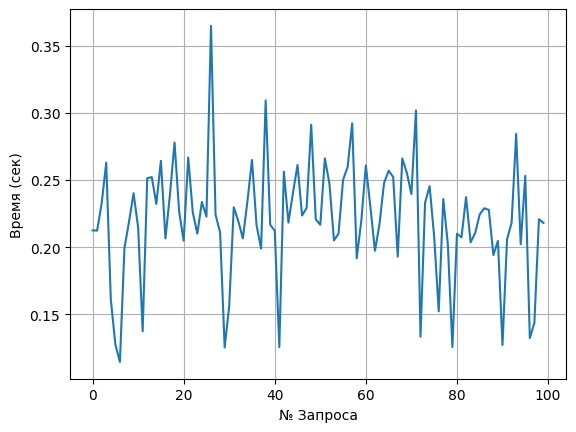

In [150]:
plt.plot([idx for idx in range(len(times))], times)
plt.grid()
plt.xlabel('№ Запроса')
plt.ylabel('Время (сек)');